# Pandasの表の加工

# DataFrameを加工しよう（連結編）

In [1]:
import pandas as pd

# ダミーの1月と2月の売上データを作成
df1 = pd.DataFrame(
    [['2017/1/3', 'A', 3], ['2017/2/4', 'B', 4]],
    columns=['Date', 'Name', 'Size'])
df1

,Date,Name,Size
0,2017/1/3,A,3
1,2017/2/4,B,4


In [2]:
# ダミーの3月の売上データを作成
df2 = pd.DataFrame([['2017/3/5', 'A', 5]], columns=['Date', 'Name', 'Size'])
df2

,Date,Name,Size
0,2017/3/5,A,5


In [3]:
# 2つの売上データを縦に結合
df3 = pd.concat([df1, df2])
df3

,Date,Name,Size
0,2017/1/3,A,3
1,2017/2/4,B,4
0,2017/3/5,A,5


In [4]:
# indexを再設定
df3 = pd.concat([df1, df2], ignore_index=True)
df3

,Date,Name,Size
0,2017/1/3,A,3
1,2017/2/4,B,4
2,2017/3/5,A,5


In [6]:
# indexを再設定
df4 = pd.concat([df1, df2]).reset_index(drop=True)
df4

,Date,Name,Size
0,2017/1/3,A,3
1,2017/2/4,B,4
2,2017/3/5,A,5


In [7]:
# 同様の結果が得られている
df3 == df4

,Date,Name,Size
0,True,True,True
1,True,True,True
2,True,True,True


In [8]:
(df3 == df4).all()


Date    True
Name    True
Size    True
dtype: bool

In [9]:
(df3 == df4).all().all()

True

- 表の横の連結

In [10]:
# ダミーの補足情報を作成
df5 = pd.DataFrame([[0], [0], [-1]], columns=['Extra'])
df5

,Extra
0,0
1,0
2,-1


In [14]:
# 2つのデータを横に結合
df6 = pd.concat([df3, df5], axis=1)
df6

,Date,Name,Size,Extra
0,2017/1/3,A,3,0
1,2017/2/4,B,4,0
2,2017/3/5,A,5,-1


In [15]:
# １列追加の場合、新しい列を作成する方法でも同じ
df7 = df3.copy()
df7['Extra'] = [0, 0, -1]
df7

,Date,Name,Size,Extra
0,2017/1/3,A,3,0
1,2017/2/4,B,4,0
2,2017/3/5,A,5,-1


In [16]:
(df6 == df7).all().all()

True

# DataFrameを加工しよう（連合編）

In [17]:
import pandas as pd

# 売上データのcsvファイルの読込み
df_log = pd.read_csv('dataset/product_log.csv')
df_log.head()

,Date,Num,Product
0,2017-01-03,1.0,B
1,2017-01-06,2.0,B
2,2017-01-07,1.0,A
3,2017-01-11,2.0,A
4,2017-01-12,2.0,B


In [18]:
# 製品マスタのcsvファイルの読込み
df_master = pd.read_csv('dataset/product_master.csv')
df_master

,Price,Product
0,1000,A
1,1200,B


In [19]:
# pd.mergeに2つのDataFrameを渡すとマージできます
# このとき、両方に含まれる列ラベルがキーとなります
df_sale = pd.merge(df_log, df_master)
df_sale.head()

,Date,Num,Product,Price
0,2017-01-03,1.0,B,1200
1,2017-01-06,2.0,B,1200
2,2017-01-12,2.0,B,1200
3,2017-01-13,3.0,B,1200
4,2017-01-15,2.0,B,1200


In [20]:
# キーを自分で指定する場合は、`on`オプションを使います
df_sale = pd.merge(df_log, df_master, on="Product")
df_sale.head()

,Date,Num,Product,Price
0,2017-01-03,1.0,B,1200
1,2017-01-06,2.0,B,1200
2,2017-01-12,2.0,B,1200
3,2017-01-13,3.0,B,1200
4,2017-01-15,2.0,B,1200


In [21]:
# 時刻順にしたいのでマージされた表を列Dateでソートします
# reset_index(drop=True)はindex(行ラベル)を再設定するイディオムです
df_sale = df_sale.sort_values("Date").reset_index(drop=True)
df_sale.head()

,Date,Num,Product,Price
0,2017-01-03,1.0,B,1200
1,2017-01-06,2.0,B,1200
2,2017-01-07,1.0,A,1000
3,2017-01-11,2.0,A,1000
4,2017-01-12,2.0,B,1200


In [22]:
#  howオプションで結合方法を指定できます
# デフォルトは inner で内部結合になります
df_sale = pd.merge(df_log, df_master, how='inner')
df_sale.head()

,Date,Num,Product,Price
0,2017-01-03,1.0,B,1200
1,2017-01-06,2.0,B,1200
2,2017-01-12,2.0,B,1200
3,2017-01-13,3.0,B,1200
4,2017-01-15,2.0,B,1200


- 売上の計算

In [26]:
# 売上を計算する
df_sale['Sale'] = df_sale.Price * df_sale.Num
df_sale.head()

,Date,Num,Product,Price,Sale
0,2017-01-03,1.0,B,1200,1200.0
1,2017-01-06,2.0,B,1200,2400.0
2,2017-01-12,2.0,B,1200,2400.0
3,2017-01-13,3.0,B,1200,3600.0
4,2017-01-15,2.0,B,1200,2400.0


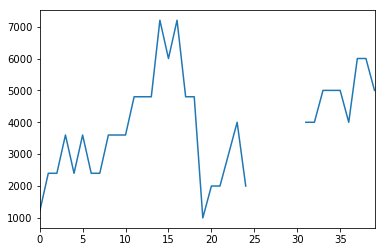

In [29]:
%matplotlib inline

#グラフを描画する
df_sale.Sale.plot()

- pandasでクロス集計を学ぼう

In [31]:
# 要素が文字列でない列に、strアクセサを使うと列が文字列であるかのように扱えます
# str[5:7]とすると、'2017-01-03'などの５文字目と６文字目をとります
df_log_date_str57 = df_log.Date.str[5:7]
df_log_date_str57.head()

0    01
1    01
2    01
3    01
4    01
Name: Date, dtype: object

In [32]:
# astype(int)でintに変換できます
df_log_date_str57_int = df_log_date_str57.astype(int)
df_log_date_str57_int.head()

0    1
1    1
2    1
3    1
4    1
Name: Date, dtype: int64

In [33]:
# 月の値を取り出し、新しい列Monthを作ります
df_log['Month'] = df_log_date_str57_int
df_log.head()

,Date,Num,Product,Month
0,2017-01-03,1.0,B,1
1,2017-01-06,2.0,B,1
2,2017-01-07,1.0,A,1
3,2017-01-11,2.0,A,1
4,2017-01-12,2.0,B,1


In [39]:
# 製品(Product)ごと、月(Month)ごとの販売個数(Num)の合計(sum)の表を作ります
df_log_pivot = df_log.pivot_table(
    values='Num', index='Product', columns='Month', aggfunc='sum')
df_log_pivot

Month,1,2,3
Product,,,
A,8.0,18.0,40.0
B,17.0,17.0,29.0


In [35]:
# aggfuncで色々なメソッドが使えます
# countで該当個数になります
df_log_pivot = df_log.pivot_table(
    values='Num', index='Product', columns='Month', aggfunc='count')
df_log_pivot

Month,1,2,3
Product,,,
A,4,5,8
B,8,5,6


In [36]:
# aggfuncを指定しないと集計方法が平均(mean)となります
df_log.pivot_table('Num', 'Product', 'Month')


Month,1,2,3
Product,,,
A,2.000,3.6,5.000000
B,2.125,3.4,4.833333


In [37]:
# aggfuncに明示的に指定することもできます
df_log.pivot_table('Num', 'Product', 'Month', aggfunc='mean')

Month,1,2,3
Product,,,
A,2.000,3.6,5.000000
B,2.125,3.4,4.833333


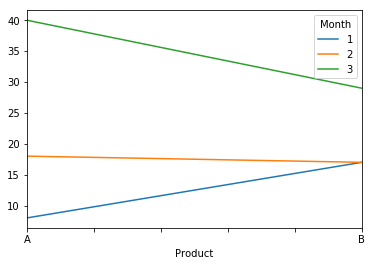

In [40]:
%matplotlib inline

# グラフを描いてみよう（横軸が製品になります）
df_log_pivot.plot();

In [41]:
# 縦横を転置した表
df_log_pivot.T

Product,A,B
Month,,
1,8.0,17.0
2,18.0,17.0
3,40.0,29.0


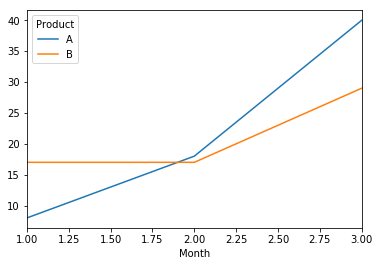

In [42]:
# 横軸を月にして、製品ごとのグラフを描きます
df_log_pivot.T.plot();